# Análisis exploratorio de incidencia delictiva en México

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/delitos.csv')

#### Ejercicio 1: Elige 3 estados de la república y grafica una serie de tiempo de la frecuencia abosluta de homicidios dolosos de enero 2015 a julio 2019 en estas tres entidades

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153600 entries, 0 to 153599
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   anio            153600 non-null  int64  
 1   clave_ent       153600 non-null  int64  
 2   entidad         153600 non-null  object 
 3   tipo_de_delito  153600 non-null  object 
 4   nombre_mes      153600 non-null  object 
 5   fecha           153600 non-null  object 
 6   frecuencia      153600 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ MB


In [10]:
df.head()

,anio,clave_ent,entidad,tipo_de_delito,nombre_mes,fecha,frecuencia
0,2015,1,Aguascalientes,Aborto,abril,2015-04-01,0.0
1,2015,1,Aguascalientes,Aborto,agosto,2015-08-01,0.0
2,2015,1,Aguascalientes,Aborto,diciembre,2015-12-01,0.0
3,2015,1,Aguascalientes,Aborto,enero,2015-01-01,0.0
4,2015,1,Aguascalientes,Aborto,febrero,2015-02-01,3.0


In [4]:
df.columns

Index(['anio', 'clave_ent', 'entidad', 'tipo_de_delito', 'nombre_mes', 'fecha',
       'frecuencia'],
      dtype='object')

In [5]:
df.entidad.unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

'Veracruz de Ignacio de la Llave' , 'Coahuila de Zaragoza' , 'Chihuahua'  

In [8]:
df['fecha'] = pd.to_datetime(df['fecha'])

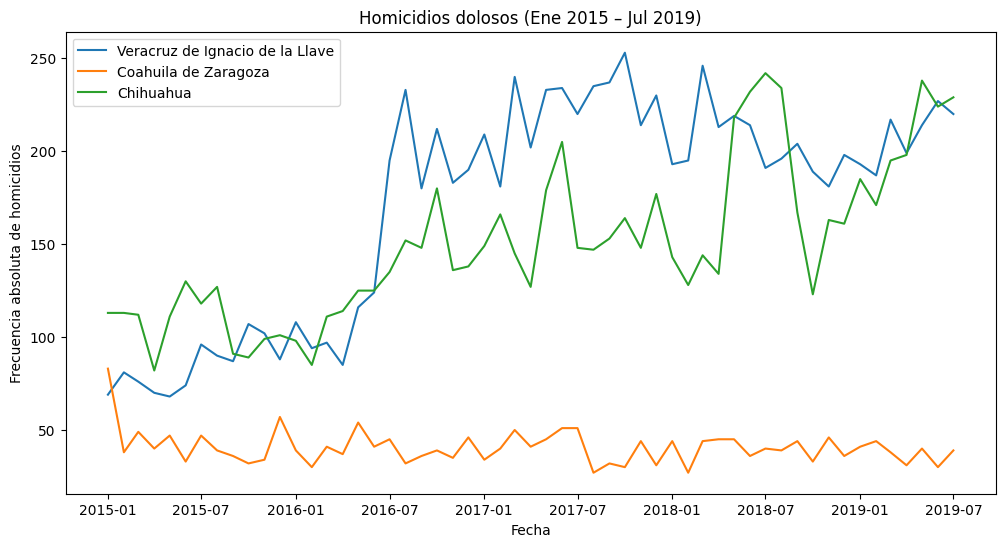

In [11]:
estados = [
    'Veracruz de Ignacio de la Llave',
    'Coahuila de Zaragoza',
    'Chihuahua'
]

df_ej1 = df[
    (df['tipo_de_delito'] == 'Homicidio') &
    (df['entidad'].isin(estados)) &
    (df['fecha'] >= '2015-01-01') &
    (df['fecha'] <= '2019-07-01')
].sort_values('fecha')

plt.figure(figsize=(12,6))

for estado in estados:
    tmp = df_ej1[df_ej1['entidad'] == estado]
    plt.plot(tmp['fecha'], tmp['frecuencia'], label=estado)

plt.xlabel('Fecha')
plt.ylabel('Frecuencia absoluta de homicidios')
plt.title('Homicidios dolosos (Ene 2015 – Jul 2019)')
plt.legend()
plt.show()



#### Ejercicio 2: Contetas las siguientes  preguntas:
1. ¿Cuántos homicidios dolosos hubo en Colima en el 2018?
2. ¿Cuantos robos de vehículo automotor ha habido en el 2019?
3. Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.
4. ¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?
5. ¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?

In [24]:
for delito in df.tipo_de_delito.unique():
    print(delito)

Aborto
Abuso de confianza
Abuso sexual
Acoso sexual
Allanamiento de morada
Amenazas
Contra el medio ambiente
Corrupción de menores
Daño a la propiedad
Delitos cometidos por servidores públicos
Despojo
Electorales
Evasión de presos
Extorsión
Falsedad
Falsificación
Feminicidio
Fraude
Homicidio
Hostigamiento sexual
Incesto
Incumplimiento de obligaciones de asistencia familiar
Lesiones
Narcomenudeo
Otros delitos contra el patrimonio
Otros delitos contra la familia
Otros delitos contra la sociedad
Otros delitos del Fuero Común
Otros delitos que atentan contra la libertad personal
Otros delitos que atentan contra la libertad y la seguridad sexual
Otros delitos que atentan contra la vida y la integridad corporal
Rapto
Robo
Secuestro
Trata de personas
Tráfico de menores
Violación equiparada
Violación simple
Violencia de género en todas sus modalidades distinta a la violencia familiar
Violencia familiar


In [28]:
#¿Cuántos homicidios dolosos hubo en Colima en el 2018?

total_2018_colima = df[
    (df['entidad'] == 'Colima') &
    (df['tipo_de_delito'] == 'Homicidio') &
    (df['anio'] == 2018)
]['frecuencia'].sum()

print("En 2018 en Colima hubo:", int(total_2018_colima), "homicidios culposos")


En 2018 en Colima hubo: 726 homicidios culposos


In [27]:
#¿Cuantos robos de vehículo automotor ha habido en el 2019?

#No encontre especificamente robos a vehiculos...pero lo hare con robos

total_219_robos_vehiculos = df[
    (df.tipo_de_delito == 'Robo') &
    (df.anio == 2019)]['frecuencia'].sum()

print("En el 2019 hubo un total de:",int(total_219_robos_vehiculos),"robos")


En el 2019 hubo un total de: 766096 robos


In [33]:
#Obten la suma de homicidos dolosos y feminidios en toda la República Mexicana en cada año.

for anio in df.anio.unique():
    suma = df[
        (df.anio == anio) &
        (
            (df.tipo_de_delito == 'Homicidio') |
            (df.tipo_de_delito == 'Feminicidio')
        )
    ]['frecuencia'].sum()
        
    print("En el año", anio,"existieron", int(suma),"muertes, entre homicidios y feminicidios")


En el año 2015 existieron 31744 muertes, entre homicidios y feminicidios
En el año 2016 existieron 36018 muertes, entre homicidios y feminicidios
En el año 2017 existieron 42068 muertes, entre homicidios y feminicidios
En el año 2018 existieron 45385 muertes, entre homicidios y feminicidios
En el año 2019 existieron 45822 muertes, entre homicidios y feminicidios
En el año 2020 existieron 44223 muertes, entre homicidios y feminicidios
En el año 2021 existieron 44960 muertes, entre homicidios y feminicidios
En el año 2022 existieron 43845 muertes, entre homicidios y feminicidios
En el año 2023 existieron 42846 muertes, entre homicidios y feminicidios
En el año 2024 existieron 22307 muertes, entre homicidios y feminicidios


In [42]:
#¿En qué mes y en qué municipio ha ocurrido el mayor número de feminicidios?

df_fem = df[df.tipo_de_delito == 'Feminicidio']

max_fem = df_fem.frecuencia.max()
max_fem

mas = df_fem[df_fem.frecuencia == max_fem][
    ['entidad', 'fecha', 'frecuencia']
]

mas


,entidad,fecha,frecuencia
83717,México,2020-07-01,19.0
99073,México,2021-08-01,19.0
114442,México,2022-10-01,19.0


In [43]:
#¿En qué año y en qué estado ha ocurrido el mayor número de feminicidios?


fem_anio_estado = df_fem.groupby(['anio', 'entidad'])['frecuencia'].sum()

max_anual = fem_anio_estado.max()

fem_anio_estado[fem_anio_estado == max_anual]



anio  entidad
2020  México     151.0
Name: frecuencia, dtype: float64

#### Ejercicio 3: Haz una gráfica de pastel de tipos de delito. Deberás crear una gráfica para cada año. Utilzia la función subplots de matplotlib

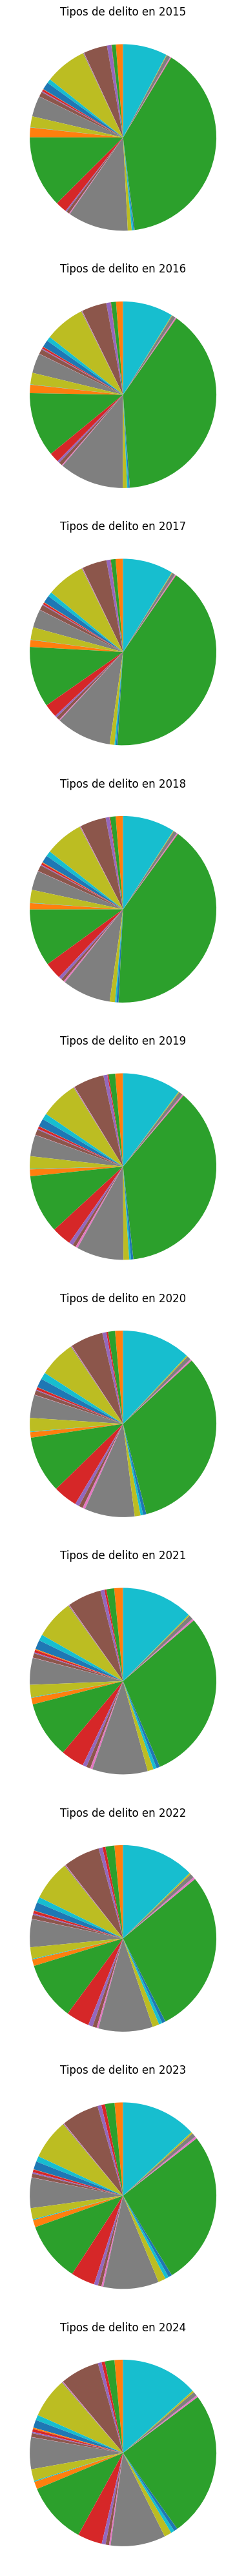

In [45]:
import matplotlib.pyplot as plt

anios = df.anio.unique()

fig, axes = plt.subplots(len(anios), 1, figsize=(8, 4 * len(anios)))

if len(anios) == 1:
    axes = [axes]

for i, anio in enumerate(anios):
    df_anio = df[df.anio == anio]
    conteo = df_anio.groupby('tipo_de_delito')['frecuencia'].sum()

    axes[i].pie(conteo, startangle=90)
    axes[i].set_title(f'Tipos de delito en {anio}')

plt.tight_layout()
plt.show()


---
#### Calcula la tasa por 100,000 habitantes
##### Tasa por 100,000 habitantes
Mostrar el total de delitos en una entidad no nos sirve de mucho. Es mucho más útil calcular la tasa de incidencia delictiva por cada 100,000 habitantes

$$
tasa = \frac{delitos\space totales}{población} \times 100,000
$$

Esta tasa la podemos anualizar multiplicándola por un factor de 12
$$
tasa\space anualizada = tasa \times 12
$$

Población por entidad federativa según [la encuesta intercensal 2015](https://www.inegi.org.mx/programas/intercensal/2015/)

No tienes que descargar nada. Ya están los datos en la carpeta data

In [46]:
pobs = pd.read_csv('data/poblacion_entidades_2015.csv', encoding='iso-8859-1', sep=";")
pobs = pobs[['Cve_Entidad', 'Entidad', 'Poblacion']]
pobs = pobs.rename(columns={'Cve_Entidad':'clave_entidad', 'Entidad':'entidad', 'Poblacion':'poblacion'})
pobs.head()

,clave_entidad,entidad,poblacion
0,1,Aguascalientes,1312544.0
1,2,Baja California,3315766.0
2,3,Baja California Sur,712029.0
3,4,Campeche,899931.0
4,5,Coahuila de Zaragoza,5217908.0


In [49]:
delitos_entidad = df_delitos.groupby('entidad')['frecuencia'].sum().reset_index()

df_tasa = delitos_entidad.merge(pobs, on='entidad')

df_tasa['tasa_100k'] = (df_tasa['frecuencia'] / df_tasa['poblacion']) * 100000

df_tasa['tasa_100k_anual'] = df_tasa['tasa_100k'] * 12

df_tasa


,entidad,frecuencia,clave_entidad,poblacion,tasa_100k,tasa_100k_anual
0,Aguascalientes,330860.0,1,1312544.0,25207.535900,3.024904e+05
1,Baja California,1027969.0,2,3315766.0,31002.459160,3.720295e+05
2,Baja California Sur,208528.0,3,712029.0,29286.447603,3.514374e+05
3,Campeche,79026.0,4,899931.0,8781.339903,1.053761e+05
4,Chiapas,193673.0,7,8918653.0,2171.549897,2.605860e+04
5,Chihuahua,655170.0,8,2954915.0,22172.211383,2.660665e+05
6,Ciudad de México,2040461.0,9,711235.0,286889.846535,3.442678e+06
7,Coahuila de Zaragoza,523033.0,5,5217908.0,10023.806476,1.202857e+05
8,Colima,218322.0,6,3556574.0,6138.547940,7.366258e+04
9,Durango,272635.0,10,1754754.0,15536.935662,1.864432e+05
